<a href="https://colab.research.google.com/github/mC-kimT/thv/blob/main/Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

from fastai.vision.all import *
from fastai.vision import *
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [ ]:
#Input dataset from your drive
PATH = '/content/drive/MyDrive/C_DATASET'

In [ ]:
class_names = []
for folder_name in os.listdir(PATH):
    class_names.append(folder_name)

In [ ]:
class_names

['w_img', 'm_img', '.ipynb_checkpoints']

In [ ]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{PATH}/{class_name}')
    for image_name in image_names:
        image_path = f'{PATH}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)

In [ ]:
df = pd.DataFrame(
    {
        'name': image_paths,
        'label': labels
    }
)

In [ ]:
df.head()

,name,label
0,/content/drive/MyDrive/C_DATASET/w_img/Modern_Style,0
1,/content/drive/MyDrive/C_DATASET/w_img/Punk_Fashion_Style,0
2,/content/drive/MyDrive/C_DATASET/w_img/Sport_Style,0
3,/content/drive/MyDrive/C_DATASET/w_img/Stylish_Style,0
4,/content/drive/MyDrive/C_DATASET/w_img/Creative_Style,0


In [ ]:
df.tail()

,name,label
18,/content/drive/MyDrive/C_DATASET/m_img/Punk_Fashion_Style,1
19,/content/drive/MyDrive/C_DATASET/m_img/Modern_Style,1
20,/content/drive/MyDrive/C_DATASET/m_img/.ipynb_checkpoints,1
21,/content/drive/MyDrive/C_DATASET/m_img/labels.csv,1
22,/content/drive/MyDrive/C_DATASET/m_img/models,1


In [ ]:
#convert into csv file
df.to_csv(
    path_or_buf=f'{PATH}/labels.csv',
    index=False
)

In [ ]:
dls =ImageDataLoaders.from_folder(
    path=PATH,
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    valid_pct=0.2, seed =42,
)

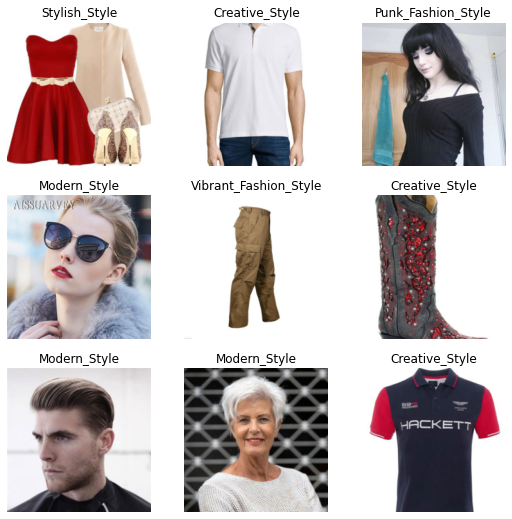

In [ ]:
dls.show_batch()

In [ ]:
model = vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy, error_rate]
)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
model.fine_tune(
    epochs=20
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.523852,1.174826,0.615616,0.384384,48:22


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.984499,0.736775,0.745245,0.254755,01:47
1,0.744671,0.769947,0.772773,0.227227,01:46
2,0.645225,0.833433,0.760761,0.239239,01:46
3,0.660782,0.862217,0.751752,0.248248,01:45
4,0.636484,1.030370,0.736737,0.263263,01:46
5,0.520625,0.867513,0.764264,0.235736,01:45
6,0.470421,0.848992,0.769770,0.230230,01:46
7,0.384197,0.867896,0.772272,0.227728,01:45
8,0.363936,0.880611,0.777277,0.222723,01:46
9,0.246980,0.930318,0.787788,0.212212,01:45


In [ ]:
model.save('C_D_Image')

Path('/content/drive/MyDrive/C_DATASET/models/C_D_Image.pth')

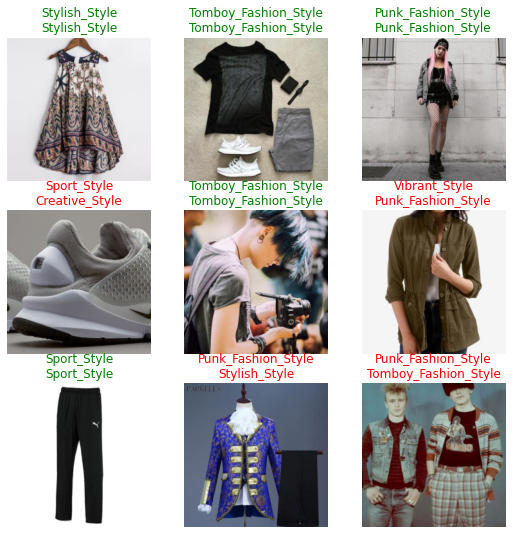

In [ ]:
model.show_results()

In [ ]:
model.predict(
    item= '/content/drive/MyDrive/Images_DataSet/images/Loud_Logos_Clothing_Style/009_28e54cf8.jpg'
)

('Punk_Fashion_Style',
 TensorBase(4),
 TensorBase([9.5951e-05, 5.2113e-02, 6.0092e-06, 1.1100e-04, 8.9340e-01,
             7.1360e-05, 4.9746e-02, 3.3399e-04, 1.7378e-03, 2.3582e-03,
             3.7802e-06, 1.9864e-05]))